# 3D Laplace Equation

## Laplace Equation
Laplace Equation은 비압축성, 비회전류 유동에서 정상상태일 때 Velocity Potential 또는 Streamfunction의 해이다.

$$
\nabla^2 u = 0.
$$

간단한 예제로 Heat Conduction에 의해 Steady State에 도달하는 경우를 생각하자

예를 들면, 윗면에 온도만 300도이고 나머지 면의 온도가 100도인 경우 최종적으로 2차원 공간 내 온도 분포는 Laplace Equation으로 구할 수 있다.

$[0,1]^3$ 공간에 대해 수식으로 표현하면 다음과 같다.

$$
-k (T_{xx} + T_{yy} + T_{zz}) = 0\\
T(x, 1, z) = 300, T(x, 0, z) = 100, 상하\\
T(x, y, 0) = T(x, y, 1) = 100, 좌우\\
T(0, y, z) = T(1, y, z) = 100, 전후\\
$$

편의상 $k=1$ 로 생각한다.

### Finite Difference Method
계산 영역을 x, y, z 각 방향별로 균일하게 나누어서 생각하자.

이 경우 3차원 Array는 각 격자점의 해와 부합한다.

각 방향별 편미분을 2차 정확도 Central Difference로 표현하면 다음과 같다.

$$
\frac {T_{i+1,j,k} -2 T_{i,j,k} +  T_{i-1,j,k}}{\Delta x^2}
+
\frac {T_{i,j+1,k}^n -2 T_{i,j,k}^n +  T_{i,j-1,k}^n}{\Delta y^2}
+
\frac {T_{i,j,k+1}^n -2 T_{i,j,k}^n +  T_{i,j,k-1}^n}{\Delta z^2}
=0
$$

$\Delta x = \Delta y = \Delta z = h$ 인 경우 다음과 같이 정리된다.

$$
T_{i+1,j,k} + T_{i,j+1,k} + T_{i, j, k+1} - 6 T_{i,j,k} + T_{i,j-1,k} + T_{i-1,j,k} + T_{i,j,k-1}
=0
$$

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

import plotly.graph_objects as go

import numpy as np
import math
from numpy import linalg

import subprocess
import time

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

## Iterative Methods

### 개념
매우 큰 행렬 System $Ax=b$ 를 반복해서 푸는 방법이다.

기본 개념은 다음과 같다.
- $A = A_1 - A_2$
   - $A_1$ 은 역행렬을 쉽게 구해지는 형태이다.
   
$$
A_1 x = A_2 x + b
$$
   
- 반복되는 해를 $x^{(k)}$ 하고 이를 적용한다.

$$
A_1 x^{(k+1)} = A_2 x^{(k)}+ b
$$

- $x^{(k)} \rightarrow x$ 이면 오차 $e^{(k)} = x^{(k+1)} - x^{(k)} \rightarrow 0$ 이다. 즉 오차가 $e^{(k)}$ 감소할 때 까지 반복한다.

   - 모든 경우에 오차가 감소하지 않는다. $A_1^{-1} A_2$ 의 Eigenvalue가 모두 1 보다 작아야 한다.
   
   
### Point Jacobi Method
이 방법은 $A_1 = D$ 로 한 경우이다.

Laplace 문제에 적용하면 다음과 같이 표현할 수 있다.

$$
T_{i, j, k}^{(n+1)} = \frac{1}{6} \left (
T_{i+1,j,k}^{(n)} + T_{i,j+1,k}^{(n)}+ T_{i,j,k+1}^{(n)} + T_{i,j-1,k}^{(n)} + T_{i-1,j,k}^{(n)} + T_{i,j,k-1}^{(n)}
\right )
$$

In [47]:
subprocess.run(["python", "3D_serial.py"])
ti_serial = np.load("ti_serial.npy")
time_serial = np.load("time_serial.npy")

In [48]:
# for y in range(1, 32, 2):
#     plt.imshow(ti_gpu[:, y, :])
#     plt.title(f'Slice at y={y}')
#     plt.colorbar()
#     plt.show()

In [49]:
subprocess.run(["python", "3D_numba.py"])
ti_numba = np.load("ti_numba.npy")
time_numba = np.load("time_numba.npy")

In [50]:
subprocess.run(["python", "3D_pycuda.py"])
ti_pycuda = np.load("ti_pycuda.npy")
time_pycuda = np.load("time_pycuda.npy")


In [51]:
subprocess.run(["python", "3D_numba_nonorm.py"])
ti_numba_nonorm = np.load("ti_numba_nonorm.npy")
time_numba_nonorm = np.load("time_numba_nonorm.npy")

In [52]:
print(time_numba)
print(time_pycuda)
print(time_serial)
print(time_numba_nonorm)

[ 1.63260145  2.92530277  5.08749499  6.76010027  8.38360372 11.11110351
 13.74619894]
[ 0.5825001   1.0629003   2.10419977  3.60269978  6.17620475 10.20079787
 16.27479739]
[  0.57999659   1.73599982   5.34600043  18.70000029  39.42802167
  74.19497943 117.1400423 ]
[ 0.92879579  1.83480189  3.33249855  7.07039962 10.44099984 17.0303046
 26.60259964]


In [59]:
if linalg.norm(ti_numba-ti_serial) < 1e-4 :
    print("Numba Solution Converged")
else:
    print("Numba Solution Error")
    print(linalg.norm(ti_numba-ti_serial))

if linalg.norm(ti_numba_nonorm-ti_serial) < 1e-4 :
    print("Numba Solution Converged")
else:
    print("Numba Solution Error")
    print(linalg.norm(ti_numba_nonorm-ti_serial))

if linalg.norm(ti_pycuda-ti_serial) < 1e-4 :
    print("Pycuda Solution Converged")
else:
    print("Pycuda Solution Error")
    print(linalg.norm(ti_pycuda-ti_serial))
 

Numba Solution Converged
Numba Solution Converged
Pycuda Solution Converged


드디어 수렴했다 쉬불롬

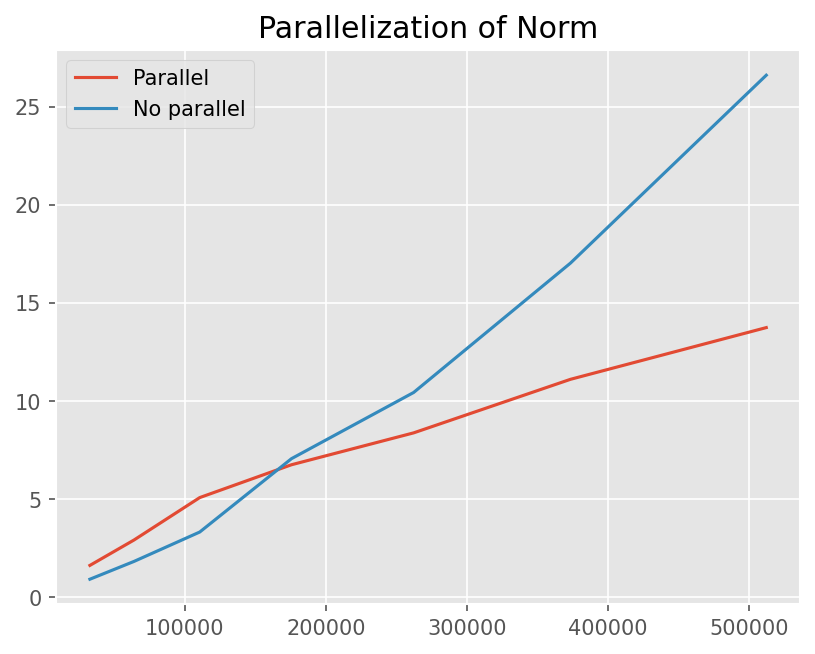

In [54]:
mesh = (np.arange(30,79,8)+2)**3  # 실제 계산된 배열은 n+2^3이기 때문
plt.title("Parallelization of Norm")
plt.plot(mesh, time_numba, label = "Parallel")
plt.plot(mesh, time_numba_nonorm, label = "No parallel")
plt.grid(True)
plt.legend()
plt.show()

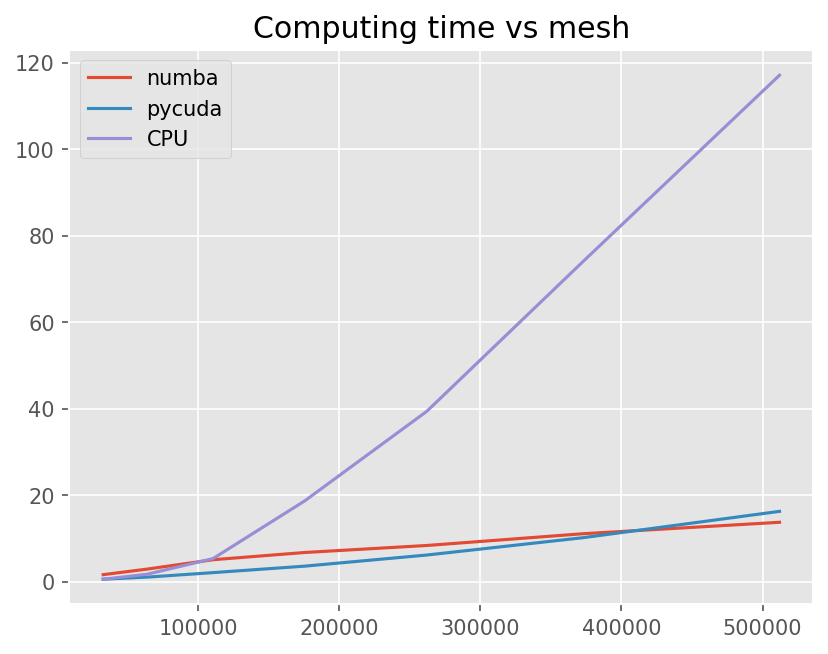

In [55]:
plt.title("Computing time vs mesh")
plt.plot(mesh, time_numba, label = "numba")
plt.plot(mesh, time_pycuda, label = "pycuda")
plt.plot(mesh, time_serial, label = "CPU")
plt.grid(True)
plt.legend()
plt.show()

In [56]:
#subprocess.run(["python", "plot3D.py"])
# 잉 이거 안되네?

## Speed-Up, Performance Drop

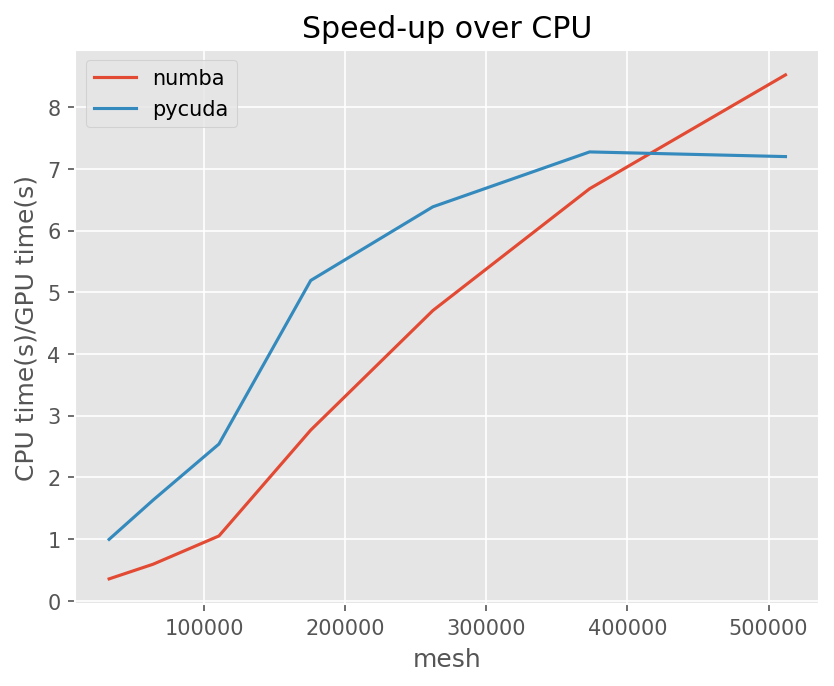

In [57]:
# Speed-up cuda over CPU
su_numba = time_serial / time_numba
su_pycuda = time_serial / time_pycuda

mesh = (np.arange(30,79,8)+2)**3  # 실제 계산된 배열은 n+2^3이기 때문
plt.title("Speed-up over CPU")
plt.plot(mesh, su_numba, label = "numba")
plt.plot(mesh, su_pycuda, label = "pycuda")
plt.xlabel("mesh")
plt.ylabel("CPU time(s)/GPU time(s)")
plt.legend()

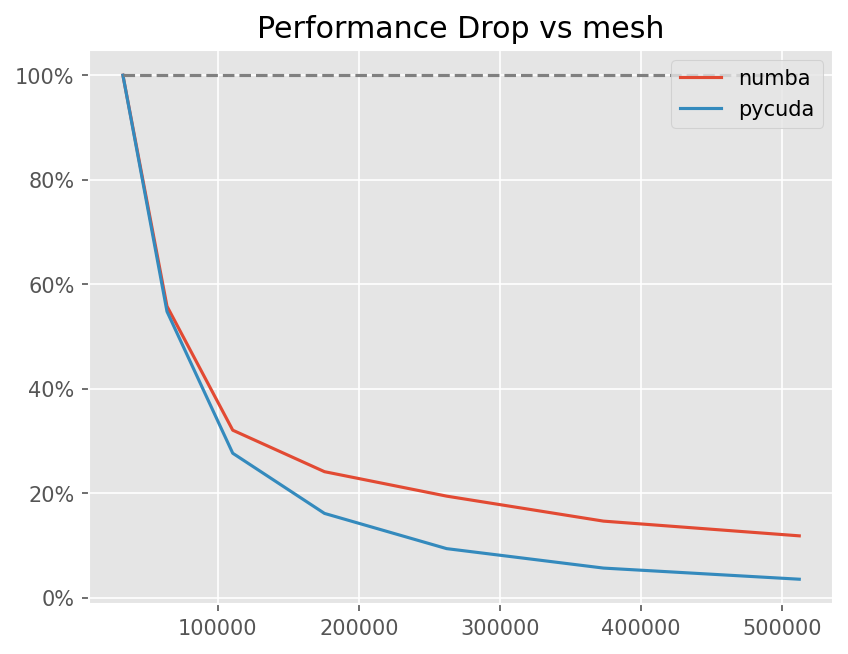

In [58]:
# n=32 기준으로 시간이 얼마나 느려지는지 플롯

t_theo_numba = time_numba[0]
t_theo_pycuda = time_pycuda[0]

plt.title("Performance Drop vs mesh")
plt.plot(mesh, t_theo_numba/time_numba*100, label = "numba")
plt.plot(mesh, t_theo_pycuda/time_pycuda*100, label = "pycuda")
plt.hlines(100, mesh[0], mesh[-1], color = 'gray', linestyles='--')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
plt.grid(True)
plt.legend()
plt.show()